# Bambang Sugeng Marsudianto

## 1. Linear Regression

In [1]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv('train.csv')
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Disini saya mencari missing value

In [ ]:
for i in df.columns:
    print(i,df[i].isnull().sum())

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol

kolom yang mengandung missing value

In [ ]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

>check kolom yang isi nya banyak missing value nya

In [ ]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [ ]:
df['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [ ]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [ ]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [ ]:
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

* kolom alley menjelaskan jenis gang atau nama gang 
* kolom miscfeature menjelaskan Fitur lain-lain yang tidak tercakup dalam kategori lain 
* kolom Fireplacequ ini menjelaskan tentang kualitas perapian
* kolom PoolQc menjelaskan tentang kualitas kolam renang
* kolom fence menjelaskan tentang kualitas pagar

> alasan kolom valley dihapus 
>> karena isi kolom yang diisi hanya 91, jauh lebih banyak daripada jumlah NaN nya maka dengan terpaksa kolom valley ini saya hapus. alasan yang kedua karena cuma 2jenis isi kolom yang Grvl dan Pave saja, tidak mungkin semua diisi antara dua itu saya. maka dari situ saya hapus.

> alasan kolom miscfeature dihapus
>> Sebenarnya hampir sama alasan yang seperti alasan kolom alley dihapus yaitu jumlah NaN nya jauh lebih banyak dibandingkan dengan kolom yang sudah diisi.

> alasan kolom Fireplacequ
>> karena kolom ini terlalu banyak terdapat missing value nya dan lumayan susah untuk diatasi oleh karena itu akan dihapus, informasi perapian mungkin fireplaces cukup untuk mendapatkan informasi tentang perapian

> alasan poolqc dihapus
>> karena kolom ini terlalu banyak missing value nya

> alasn fence dihapus
>> karena kolom ini terlalu banyak missing value nya

In [ ]:
df.drop(columns=['Alley','MiscFeature','FireplaceQu', 'PoolQC', 'Fence'], inplace=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

> selanjutnya saya mengisi kolom yang terdapat missing value yang nilai nya bisa diatasi dengan mengisi nilai modusnya

In [ ]:
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)
df['LotFrontage'].fillna(df['LotFrontage'].mode()[0], inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0], inplace=True)
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0], inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace=True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)

In [ ]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

> Selanjutnya kita melakukan encoding, agar data yang bertipe object kita harus gunakan get dumies untuk merubah nya

In [ ]:
df = pd.get_dummies(df,columns=['LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MSZoning','Street','SaleCondition', 'SaleType', 'PavedDrive', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType','HeatingQC','Heating' , 'Functional', 'KitchenQual', 'Electrical', 'CentralAir'])
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,CentralAir_N,CentralAir_Y
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,1,0,0,0,0,0,1,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,1,0,0,0,0,1,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,1,0,0,0,0,0,1,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,1,0,0,0,0,0,1,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,1,0,0,0,0,0,1,0,1


> Pilih data X dan Y yang sudah ditentukan

In [ ]:
X = df.loc[:, df.columns != 'SalePrice']
y = df["SalePrice"] #target 

> selanjut nya kita splitting X dan y menjadi data training dan data testing, yang sudah dibagi menjadi 40 untuk data testing dan 60 untuk data training

In [ ]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

> import module sklearn untuk mendapatkan linear model

In [ ]:
from sklearn import linear_model, metrics

> kita simpan model kita yaitu linearRegression kedalam variable reg

In [ ]:
 # create linear regression object
reg = linear_model.LinearRegression()


> Salanjutnya kita latih model kita menggunakan perintah fit yang dimiliki modul sklearn

In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

> Setelah dilatih kita dapat memeriksa masing - masing koefisien model dengan menggunakan sebagai berikut, untuk mengetahui rumus yang ada yaitu kita perlu tau coef dan interceptnya.

In [ ]:
print('Coefficients: ', reg.coef_)

Coefficients:  [ 2.78391343e+00 -1.60508885e+02  4.79398760e+01  1.08626678e+00
  4.91280574e+03  6.09136738e+03  2.34928756e+02  2.81931018e+01
  1.46806935e+01  1.91281378e+01  1.08748238e+00 -3.06991561e+00
  1.71457146e+01  1.75111452e+01  2.65153225e+01 -6.28715874e+00
  3.77393054e+01 -7.48369143e+02  1.27026021e+03  3.63907213e+03
  1.87111137e+03 -1.71790017e+03 -1.17994315e+04 -1.13133879e+02
  2.63709905e+03  3.77697519e+01  4.62506056e+03  1.26994215e+01
  6.23615267e+00  2.57340017e+01 -3.34098651e+00  1.92204720e+01
  1.64938282e+01  4.08120806e+01  6.74216766e-01 -3.02814048e+02
 -7.05215909e+02  2.55341863e+03  1.37846223e+03 -7.28586690e+03
  3.35398604e+03  1.60388253e+02  1.13972019e+04 -1.64871285e+04
  4.92953831e+03  2.47460639e+04 -2.47460639e+04  2.05983741e+03
  7.10688057e+03 -5.05592951e+02 -7.64371782e+03 -1.01740721e+03
  2.54242728e+04  2.67014221e+04 -5.21256949e+04  1.92818122e+04
  8.39445663e+03  9.25626214e+03 -6.45902484e+03 -9.51922016e+03
 -5.063982

> Kita juga dapat melihat intercept dari persamaan regresi

In [ ]:
print('Intercept: ', reg.intercept_)

Intercept:  721246.9750490277


> Rumus yang dilakukan yaitu kalau ditulis Y = 721246.97 + 2.78391343e * X1 dan seterusnya sampe akhir dari coef 

> Selanjutnya Kita akan melakukan evaluate

>> sebelumnya kita predict terlebih dahulu Xtest nya, dan disimpan bebas dengan nama apa tapi disini saya simpan dengan nama y_pred

In [ ]:
y_pred = reg.predict(X_test)

>> MAE(Mean Absolute Error) adalah menghitung perbedaan absolut antara nilai aktual dan prediksi. data asli kan kita tulis menjadi y_test dan data prediksi ditulis dengan nama y_pred

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

20273.934426872016

>> Mean Squared Error (MSE) adalah menyatakan bahwa menemukan perbedaan kuadrat antara nilai aktual dan prediksi.

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1892184858.3086932

>> Root Mean Squared Error (RMSE) adalah akar kuadrat sederhana dari kesalahan kuadrat rata-rata. karena RMSE adalah akar dari MSE maka kita perlu tulis perintah tambahan yaitu Squared=False

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

43499.251238483324

In [ ]:
from sklearn.metrics import r2_score
r2_score( y_test,y_pred)

0.713720739198715

>> Score yang dihasilkan cukup bagus  70%

>  Explain or Interpret the linear correlation between 3 features and the target (“SalePrice”) 

>> saya disini ingin melihat correlation siapa sih yang tertinggi dengan target yaitu salePrice

In [ ]:
df.corrwith(df["SalePrice"]).sort_values()

ExterQual_TA       -0.589044
KitchenQual_TA     -0.519298
GarageFinish_Unf   -0.513906
BsmtQual_TA        -0.498545
MasVnrType_None    -0.367456
                      ...   
GarageArea          0.623431
GarageCars          0.640409
GrLivArea           0.708624
OverallQual         0.790982
SalePrice           1.000000
Length: 272, dtype: float64

>> Ternyata 3 variable yang berpengaruh pada feature adalah variable 
* pertama ada OveralQual dengan nilai 0.790982 yang berisi tentang kualitas akhir dan bahan keseluruhan
* Kedua ada GrLivArea dengan nilai 0.708624 yang berisi tentang yang mempunyai ruang tamu diatas
* Ketiga ada GarageCars dengan nilai 0.640409 yang berisi tentang yang mempunyai ruang bagasi untuk mobil

## 2. Classification Models

In [2]:
df1 = pd.read_csv('heart.csv')
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


> check missing value

In [ ]:
for i in df1.columns:
    print(i,df1[i].isnull().sum())

Age 0
Sex 0
ChestPainType 0
RestingBP 0
Cholesterol 0
FastingBS 0
RestingECG 0
MaxHR 0
ExerciseAngina 0
Oldpeak 0
ST_Slope 0
HeartDisease 0


>> tidak ada missing value

> check apakah data yang dipakai pada feature sudah balance

In [ ]:
import seaborn as sns


In [ ]:
df1['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

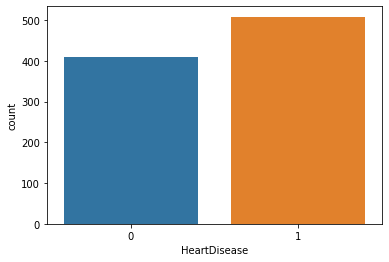

In [ ]:
sns.countplot(df1['HeartDisease'])

In [4]:
import plotly.express as px
fig = px.pie(df1, names='HeartDisease',)
fig.update_layout(title='Persentase dari Heart Disease')
fig.show()

>> data yang sudah ada sudah seimbang atau balanced bisa diliat diatas proportion yang sudah dibuat

> selanjutnya saya mencoba ekspolrasi data yang ada 

>> melihat distribusi usia secara umum

In [8]:
fig = px.histogram(df1, x="Age", marginal="box")
fig.update_layout(title='Distribution of Age')
fig.show()

dari sini saya melihat yang dari data df1 yang paling muda yaitu umur 28 tahun dan yang paling tua 77 tahun dan median nya di umur 54tahun

In [14]:
colors =['pink', 'lightblue']
fig = px.histogram(df1, x="Age", color="HeartDisease", marginal="box", histnorm='probability density', color_discrete_map={0:'#2a9d8f',1:'#e9c46a'})
fig.show()

dari visualisasi diatas kita dapat mengetahui bahwa pada umur antara 50 - 60 orang banyak terkena penyakit jatung. Pada umur 54-55 paling banyak terkena penyakit jantung. probabilitas density ini untuk melihat probabalitas nya atau peluang terkena nya penyakit tersebut

In [16]:
df1['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [17]:
df1['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

> selanjutnya kita lakukan encoding data object

>> disini saya ingin jenis kelamin atau sex yang tadinya berupa M dan f saya ganti menjadi 0 dan 1
* 1 sebagai male atau laki - laki
* 0 sebagai female atau perempuan

In [22]:
df1['Sex'] = df1['Sex'].replace(['M','F'],[1,0])

In [23]:
df1.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0


> Check tipe data agar kita buat data encodingnya agar bisa dimasukan di variable X yang akan dijadidikan data training dan testing

In [24]:
df1.dtypes

Age                 int64
Sex                 int64
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

> Kita lakukan encoding yaitu mengganti nilai yang terdapat isi diganti dengan angka 1 dan kalau bukan diganti angka 0

In [25]:
df1= pd.get_dummies(df1, columns=['ChestPainType', 'ST_Slope'])
df1.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,Normal,172,N,0.0,0,0,1,0,0,0,0,1
1,49,0,160,180,0,Normal,156,N,1.0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,ST,98,N,0.0,0,0,1,0,0,0,0,1
3,48,0,138,214,0,Normal,108,Y,1.5,1,1,0,0,0,0,1,0
4,54,1,150,195,0,Normal,122,N,0.0,0,0,0,1,0,0,0,1


>> Selanjutnya encoding menggunakan label encoding, Alasan menggunakan label encoding adalah isi dari tabel tersebut adalah bentuk nya bukan menunjukan perbedaan. tidak seperti kolom contoh isi kolom sex yang menunjukan hanya pria atau wanita dan ngk mungkin ada lagi selain itu makanya bisa menggunakan get dumies

In [27]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df1['RestingECG']= label_encoder.fit_transform(df1['RestingECG'])
df1['ExerciseAngina']= label_encoder.fit_transform(df1['ExerciseAngina'])
  
df1

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,1,172,0,0.0,0,0,1,0,0,0,0,1
1,49,0,160,180,0,1,156,0,1.0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,2,98,0,0.0,0,0,1,0,0,0,0,1
3,48,0,138,214,0,1,108,1,1.5,1,1,0,0,0,0,1,0
4,54,1,150,195,0,1,122,0,0.0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,1,132,0,1.2,1,0,0,0,1,0,1,0
914,68,1,144,193,1,1,141,0,3.4,1,1,0,0,0,0,1,0
915,57,1,130,131,0,1,115,1,1.2,1,1,0,0,0,0,1,0
916,57,0,130,236,0,0,174,0,0.0,1,0,1,0,0,0,1,0


In [29]:
df1.dtypes

Age                    int64
Sex                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
RestingECG             int64
MaxHR                  int64
ExerciseAngina         int64
Oldpeak              float64
HeartDisease           int64
ChestPainType_ASY      uint8
ChestPainType_ATA      uint8
ChestPainType_NAP      uint8
ChestPainType_TA       uint8
ST_Slope_Down          uint8
ST_Slope_Flat          uint8
ST_Slope_Up            uint8
dtype: object

> Selanjutnya kita pilih data X dan y
* data X berisi tentang selain HearDisease
* data y berisi tentang HeartDisease sebagai Feature

In [30]:
X = df1.loc[:, df1.columns != 'HeartDisease']
y = df1["HeartDisease"]

> selanjut nya kita splitting X dan y menjadi data training dan data testing, yang sudah dibagi menjadi 40 untuk data testing dan 60 untuk data training

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

> Selanjutnya kita masuk logreg

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



>> kita import LogisticRegression dari sklearn linear model. kita simpan kedalam nama variable bernama lr. lalu lr ini kita fit dengan x_train dan y_train


>> Selanjut nya membuat mode Random Forest

Random Forest adalah gabungan beberapa decision tree yang menggunakan  bugging. Bugging ini adalah melihat mana yang hasil paling banyak, semisal kita punya tree pertama hasilnya 1, dtree kedua 1, dtree ketiga 0 berarti random forest nya 1. mana yang menunjukan paling banyak atau mojority voting. Karena tree ini model nya bisa saja overfitting makanya dibuat random forest, random forest membagi jadi beberapa tree lalu hasil nya digabung dan bisa mengatasi overfitting tersebut.

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

kita import randomforestclassifier nya dari sklearn.esemble lalu kita simpan kedalam variable dengan nama rf. pada rf ini kita isikan random_state yang ketika kita jalankan nilai nya maka akan tetap. ada n_jobs yang memspesifkasikan berapa sih mesin yang kita run, kita isikan disitu -1 untuk bisa kita jalankan disemua laptop kita.max_dept ini adalah seberapa maksimalkah kedalaman tree yang nanti kita buat. n_estimator adalah sebarapa banyak estimator yang mau kita pakai. oob_score ini berguna ketika kita ingi menset ada salah satu mstriks yang namanya oob_score.

> HyperParameter turning kita gunakan untuk mengiterasi secara berulang - ulang sampai mendapatkan yang terbaik

kita ingin membuat nilai variable rf dengan mengisi parameter secara manual karena kita ingin membuatgrid search yang mana kita sudah definisikan mau berapa saja yang dicoba.

In [38]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [39]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

kita isi parameter apa saj ayang kita inginkan. saya isi max depth nya menjadi beberapa layer ada yang 2,3,.... min_sample_leaf ini adalah minimum sample yang dibuat untuk ngedefind. n_estimator adalah jumlah tree yang di forest

In [43]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

seperti yang saya katakan diatas kita akan gunakan grid search. gridsearch sendiri sudah dibuat di sklearn.model_selection. estimator kita isikan model yang kita gunakan yaitu randomforest yang sudah kita simpan kedalam variable bernama rf. param_grid untuk mendeklarasikan parameter yang sudah kita buat yaitu bernama params. CV adalah kepanjangan dari Cross Validation, untuk memecah jadi berapa banyak bagian unutk ditest. Scoring ini kita pakai apa

In [44]:
grid_search.best_score_

0.8690230614619697

untuk melihat best score nya kita gunakan .best_score_. Ternyata score yang paling terbaik adalah 0.869..

In [45]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

untuk melihat berapa sih best estimator nya dan ternyata best estimator kita max_depth nya 20, min_sampleleaf nya 5 

**EVALUATION**

In [46]:
y_lr = lr.predict(X_test)
y_rf = rf_best.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_lr))
print(confusion_matrix(y_test, y_rf))

[[135  18]
 [ 29 186]]
[[131  22]
 [ 23 192]]


kalau diliat dari cofusion matriks dua model kita cukup baik yah karena yang kita prediksi terkena penyakit jantung dan aslinya emang terkena penyakit jantung bisa kita liat di TP(true positif) dan yang kita prediksi tidak terkena penyakit jantung dan dari data asli nya juga benar tidak terkena penyakit jantung bisa kita liat di TN(true negatif).

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr))
print("=======================================================")
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       153
           1       0.91      0.87      0.89       215

    accuracy                           0.87       368
   macro avg       0.87      0.87      0.87       368
weighted avg       0.87      0.87      0.87       368

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       153
           1       0.90      0.89      0.90       215

    accuracy                           0.88       368
   macro avg       0.87      0.87      0.87       368
weighted avg       0.88      0.88      0.88       368



pada dataset ini tentang penyakit yang cocokdengan classification report adalah recall karena kita mempehatikan FN(false negatif) karena kondisi ini akan berbahaya pada pasien yang sebenernya terkena penyakit jantung, tapi model memprediksi tidak sakit jantung, pasien tersebut merasa aman aman aja karena ngk diprediksi terkena. oleh karena itu sebisa mungkin recall yang diberikan harus besar dan FN nya harus sekecil mungkin.


In [53]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.8737346101231189
0.8746162030703755


Ternyata dari Evaluation Auc nya hampir sama tetapi model random forest masih lebih besar sedikit

**Memilih Model**

> Model yang cocok menurut saya adalah random forest dibandingkan dengan Logreg
Karena pada confusion matriks nilai FN random forest lebih kecil dibandingkan dengan logreg. Nilai FN pada ini sangat lah penting walaupun beda 1 yah karena itu berhubungan dengan nyawa dan dengan nilai fn juga yang kita prediksi terkena namun asli nya tidak, akan lebih berhati hati untuk menjaga kesehatan nya. alasan yang kedua pada nilai AUC lebih besar sedikit dibandingkan nilai AUC pada logreg, dengan begitu semakin besar nilai auc semakin bagus model nya karena ternyata bener yang kita prediksi terkena maka terkena dan yang kita prediksi tidak kena dan hasil nya kena.